In [49]:
import numpy as np
import matplotlib.pyplot as plt
from HF_spinspliting import *

def occupation_spin(state, Lx, Ly):
    '''
    Compute the occupation number of input state. Output is a 1D numpy array.
    '''
    HF_sol = np.power(state[:, 0: (Lx*Ly+dope)//2], 2)
    sz = np.sum(HF_sol, axis=1)
    return sz

# 1. Site spins Sz of symmetry protected phase
t = 1
U = 1
gamma = 0.1
dope = 0

Lx = 100
Ly = 8


val_up, vec_up, val_dn, vec_dn = HF_vec(t, U, gamma, dope, Lx, Ly)

Number of impurity sites: 80
Using PM initial condition
At iteration: 0
At iteration: 1
At iteration: 2
At iteration: 3
At iteration: 4
At iteration: 5
At iteration: 6
At iteration: 7
At iteration: 8
At iteration: 9
At iteration: 10
At iteration: 11
At iteration: 12
At iteration: 13


In [50]:
def compute_qA(state, Lx, Ly):
    '''
    Compute probability density distributed on A-carbon sites of a given 
    state.
    '''
    prob_density = state**2
    prob_Asites = np.take(prob_density, list_Asite(Lx, Ly))
    return np.sum(prob_Asites)


compute_qA(vec_dn[:, Lx*Ly//2], Lx, Ly)

0.27932348058121714

In [55]:
import matplotlib.pyplot as plt
import numpy as np


def plot_charge(state, energy_val, Lx, Ly, savefile=False, **kwargs):
        '''
        Generate surface plot of the input state.
        '''
        fig = plt.figure(dpi=300) 
        ax = plt.axes(projection='3d') 

        X = np.arange(Lx)
        Y = np.arange(Ly)
        X, Y = np.meshgrid(X, Y)
        prob_A_up = [aa if np.isin(i, list_Asite(Lx, Ly)) == True
                else 0 for i, aa in enumerate(state**2)]
        prob_B_up = [aa if np.isin(i, list_Bsite(Lx, Ly)) == True
                else 0 for i, aa in enumerate(state**2)]
        qA = compute_qA(state, Lx, Ly)


        col1 = np.full(np.reshape(prob_A_up, (Ly, Lx)).shape, 'lime')
        col1[Ly-1, :] = np.full(Lx, 'none')
        col2 = np.full(np.reshape(prob_B_up, (Ly, Lx)).shape, 'blue')
        col2[Ly-1, :] = np.full(Lx, 'none')

        ax.plot_surface(np.append(X, X, axis=0),
                        np.append(Y, Y, axis=0),
                        np.append(np.reshape(prob_A_up, (Ly, Lx)), 
                                np.reshape(prob_B_up, (Ly, Lx)), axis=0),
                        facecolors= np.append(col1, col2, axis=0),
                        antialiased=True,  linewidth=1, rstride=1, cstride=1,
                        zorder=1, shade=False)

        ax.set_xlabel("$k$", fontsize=16)
        ax.set_ylabel("$l$", fontsize=16)
        ax.zaxis.set_rotate_label(False) 
        ax.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
        ax.ticklabel_format(axis='z', useOffset=False)
        ax.set_box_aspect((2,1,1))
        ax.set_xticks(np.arange(0, Lx+1, Lx//5))
        ax.set_yticks(np.arange(0, Ly+1, Ly//4))
        ax.view_init(elev=20., azim=-30)
        ax.set_title(r"$E/t = %1.5f, q_{A} = %1.5f $" 
                    % tuple((energy_val, qA)))
        if savefile == True:
                plt.savefig(f'./fractional_charge/state_U{U}_gamma{gamma}_E{energy_val}qA{qA}.png', 
                            bbox_inches='tight')
        else:
                plt.show()

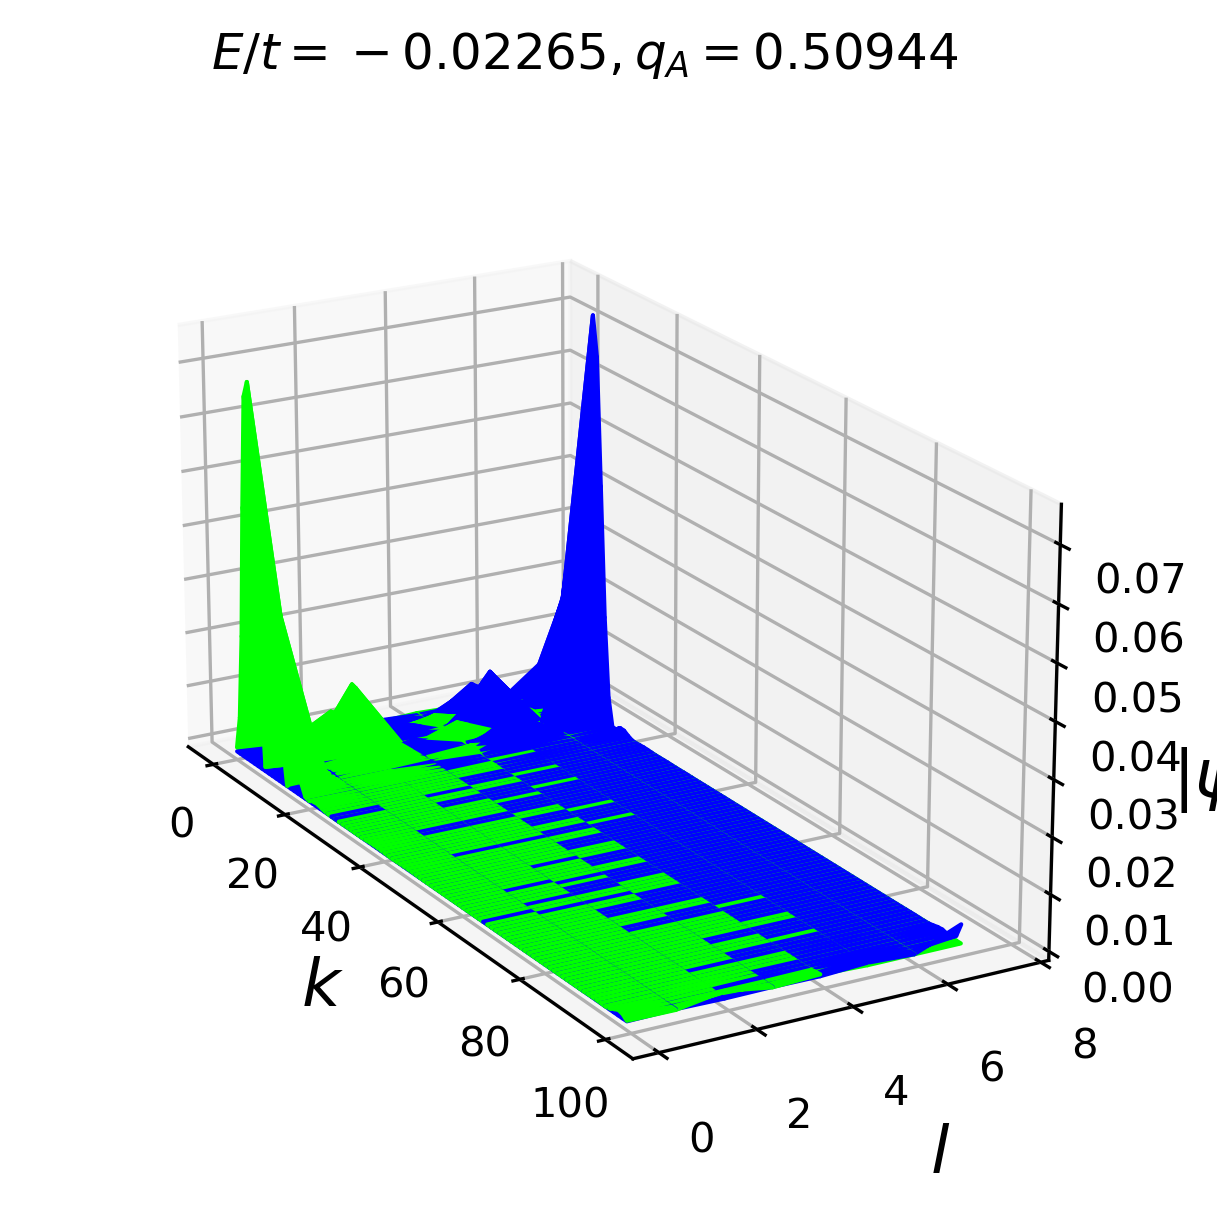

In [58]:
val_up[Lx*Ly-1]
compute_qA(vec_up[:, Lx*Ly-1], Lx, Ly)

plot_charge(vec_up[:, Lx*Ly//2-1], val_up[Lx*Ly//2-1], Lx, Ly)

In [63]:
def concatenate(**words):
    result = ""
    for arg in words.values():
        result += arg
    return result

concatenate(a="Real", b="Python", c="Is", d="Great", e="!")

'RealPythonIsGreat!'

In [68]:
a = dict(a='Real')

In [81]:
list(a.values())[0]+'a'

'Reala'

In [ ]:
str